<a href="https://colab.research.google.com/github/yui-miffy/Python/blob/main/keitaiso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Mecabのインストール
!pip install mecab-python3==0.996.5


     |████████████████████████████████| 17.1 MB 352 kB/s 


In [5]:
#MeCabで形態素解析
import MeCab
mecab = MeCab.Tagger('-Ochasen')
data = mecab.parse('庭には２羽裏庭には２羽鶏がいる')
print(data)

庭	ニワ	庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
２	ニ	２	名詞-数		
羽	ワ	羽	名詞-接尾-助数詞		
裏庭	ウラニワ	裏庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
２	ニ	２	名詞-数		
羽	ワ	羽	名詞-接尾-助数詞		
鶏	ニワトリ	鶏	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
いる	イル	いる	動詞-自立	一段	基本形
EOS



In [6]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [7]:
#走れメロスのテキストデータ（zipファイル）をダウンロード
!curl -O "https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip"
#zipファイルを解凍
!unzip 1567_ruby_4948.zip
#文章のみ切り出し
!sed -n 17,91p hashire_merosu.txt > hashire_merosu_data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10952  100 10952    0     0  13863      0 --:--:-- --:--:-- --:--:-- 13845
Archive:  1567_ruby_4948.zip
Made with MacWinZipper™
  inflating: hashire_merosu.txt      


In [8]:
#テキストファイル読み込み
text_file = open('/content/hashire_merosu_data.txt',encoding = 'shift_jis')
contents = text_file.read()

In [9]:
import MeCab
from wordcloud import WordCloud
from collections import Counter

#MeCabで形態素解析
mecab = MeCab.Tagger('-Ochasen')
node = mecab.parseToNode(contents)
words = []

while node is not None:

    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]

    #品詞が名詞、品詞細分類１が一般のとき
    if pos_type in ['名詞']:
        if subtype in ['一般']:
            words.append(node.surface)

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()

#出現回数結果の画面出力
for word, cnt in result:
    print(word, cnt)

メロス 73
人 20
友 18
王 16
セリヌンティウス 14
妹 12
男 12
市 11
村 9
声 9
わし 8
陽 8
心 7
群衆 7
結婚式 6
暴君 6
自分 6
身代り 6
間 6
家 6
濁流 6
羊 5
王城 5
磔 5
兄 5
頬 5
神 5
気 5
信実 5
夢 5
牧人 4
花婿 4
祝宴 4
様子 4
老爺 4
王様 4
婿 4
顔 4
手 4
眼 4
雨 4
浪 4
流れ 4
愛 4
力 4
峠 4
山賊 4
命 4
勇者 4
刑場 4
野 3
此 3
シラクス 3
花嫁 3
石工 3
まち 3
路 3
からだ 3
人質 3
ひとり 3
ディオニス 3
しわ 3
人間 3
情 3
亭主 3
日没 3
いのち 3
縄 3
村人 3
姿 3
他 3
一つ 3
身 3
腕 3
太陽 3
正義 3
精 3
胸 3
水 3
音 3
風 3
最後 3
邪智 2
里 2
暮し 2
衣裳 2
竹馬 2
日 2
若い衆 2
歌 2
両手 2
悪心 2
自身 2
悪徳 2
溜息 2
罪 2
口 2
わ 2
足もと 2
嗄 2
嘘 2
友人 2
気持 2
願い 2
永遠 2
もの 2
事情 2
用事 2
豪雨 2
わが身 2
小降り 2
未練 2
宝 2
宴席 2
幾度 2
大声 2
夫婦 2
友達 2
誠 2
い 2
目 2
棍棒 2
天 2
真 2
不信 2
みじん 2
心臓 2
かな 2
耳 2
頭 2
葉 2
酒宴 2
裸体 2
塔 2
夕陽 2
フィロストラトス 2
仲間 2
マント 2
暴虐 1
政治 1
笛 1
山越え 1
こ 1
父 1
母 1
女房 1
律 1
品々 1
都 1
大路 1
楽しみ 1
首 1
ろう 1
語勢 1
あたり 1
世嗣 1
つぎ 1
御子 1
皇后 1
賢 1
臣 1
アレキス 1
国王 1
臣下 1
疑い 1
十字架 1
呆 1
警吏 1
短剣 1
騒ぎ 1
短刀 1
威厳 1
以 1
眉間 1
皺 1
民 1
忠誠 1
心構え 1
あて 1
私慾 1
呟 1
つぶ 1
ためいき 1
地位 1
賤 1
腹 1
綿 1
奥底 1
詫 1
びたって 1
悧巧 1
惚 1
命乞い 1
視線 1
瞬時 1
日限 1
ば 1
うそ 1
小鳥 1
帰り 1
無二 1
日暮 1
北 1
叟笑 1
嘘つき 1
だま 1
振り

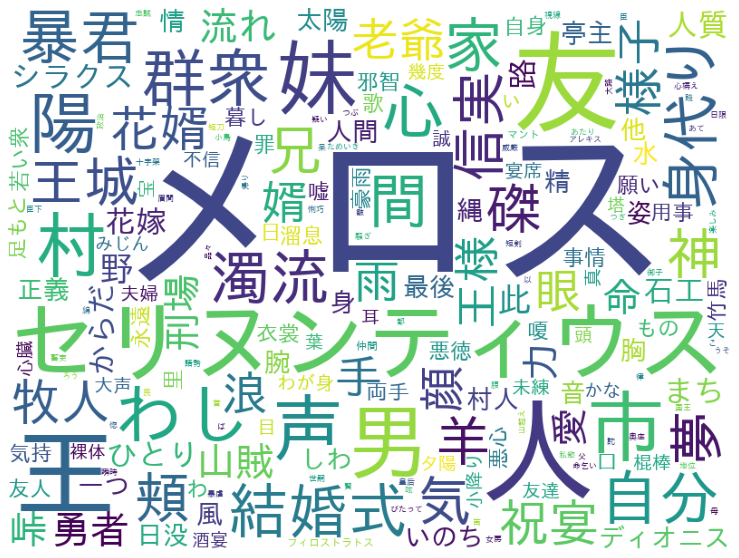

In [10]:
#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
width=800,height=600).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()